<div>
  <img style="float: left;"  width="140" src=" 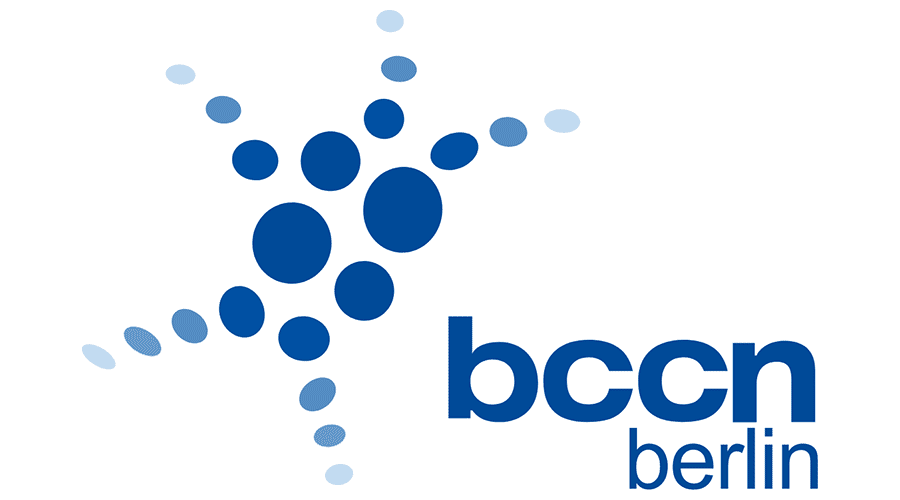">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Jarek Liesen
    <br>(jarek@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (**a single `.ipynb` file**). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

If you have any questions about the exercises, please ask them **on the Moodle forum** of the course.

In [ ]:
NAMES = ["", ""]
GROUP = ""

In [ ]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 2: Slow Feature Analysis

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Slow-Feature-Analysis-on-two-independent-signals-(10-points)" data-toc-modified-id="Exercise-1:-Slow-Feature-Analysis-on-two-independent-signals-(10-points)-1">Exercise 1: Slow Feature Analysis on two independent signals (10 points)</a></span><ul class="toc-item"><li><span><a href="#1.1:-Define-a-function-which-generates-&quot;natural&quot;-signals-(1-point)" data-toc-modified-id="1.1:-Define-a-function-which-generates-&quot;natural&quot;-signals-(1-point)-1.1">1.1: Define a function which generates "natural" signals (1 point)</a></span></li><li><span><a href="#1.2-Study-the-effect-of-$\epsilon$-in-your-function" data-toc-modified-id="1.2-Study-the-effect-of-$\epsilon$-in-your-function-1.2">1.2 Study the effect of $\epsilon$ in your function</a></span><ul class="toc-item"><li><span><a href="#1.2-a)-Generate-and-plot-two-singals-(1-point)" data-toc-modified-id="1.2-a)-Generate-and-plot-two-singals-(1-point)-1.2.1">1.2 a) Generate and plot two singals (1 point)</a></span></li><li><span><a href="#1.2-b)-Discuss-your-results-(1-point)" data-toc-modified-id="1.2-b)-Discuss-your-results-(1-point)-1.2.2">1.2 b) Discuss your results (1 point)</a></span></li></ul></li><li><span><a href="#1.3-Perform-Slow-Feature-Analysis-(SFA)" data-toc-modified-id="1.3-Perform-Slow-Feature-Analysis-(SFA)-1.3">1.3 Perform Slow Feature Analysis (SFA)</a></span><ul class="toc-item"><li><span><a href="#1.3-a)-Compute-the-covariance-matrix-(0.5-points)" data-toc-modified-id="1.3-a)-Compute-the-covariance-matrix-(0.5-points)-1.3.1">1.3 a) Compute the covariance matrix (0.5 points)</a></span></li><li><span><a href="#1.3-b)-Compute-the-matrix-of-second-moments-of-the-temporal-derivatives-(0.5-points)" data-toc-modified-id="1.3-b)-Compute-the-matrix-of-second-moments-of-the-temporal-derivatives-(0.5-points)-1.3.2">1.3 b) Compute the matrix of second moments of the temporal derivatives (0.5 points)</a></span></li><li><span><a href="#1.3-c)-Solve-the-Generalized-Eigenavlue-Problem-(1-point)" data-toc-modified-id="1.3-c)-Solve-the-Generalized-Eigenavlue-Problem-(1-point)-1.3.3">1.3 c) Solve the Generalized Eigenavlue Problem (1 point)</a></span></li><li><span><a href="#1.3-d)-Discuss-your-results-(2-points)" data-toc-modified-id="1.3-d)-Discuss-your-results-(2-points)-1.3.4">1.3 d) Discuss your results (2 points)</a></span></li></ul></li><li><span><a href="#1.4-Perform-SFA-on-singals-of-different-lengths" data-toc-modified-id="1.4-Perform-SFA-on-singals-of-different-lengths-1.4">1.4 Perform SFA on singals of different lengths</a></span><ul class="toc-item"><li><span><a href="#1.4-a)-Perform-SFA-(1-point)" data-toc-modified-id="1.4-a)-Perform-SFA-(1-point)-1.4.1">1.4 a) Perform SFA (1 point)</a></span></li><li><span><a href="#1.4-b)-Discuss-your-results-(1-point)" data-toc-modified-id="1.4-b)-Discuss-your-results-(1-point)-1.4.2">1.4 b) Discuss your results (1 point)</a></span></li></ul></li><li><span><a href="#1.5:-How-to-the-eigenvalue-depend-on-$\tau$?-(1-point)" data-toc-modified-id="1.5:-How-to-the-eigenvalue-depend-on-$\tau$?-(1-point)-1.5">1.5: How to the eigenvalue depend on $\tau$? (1 point)</a></span></li></ul></li><li><span><a href="#Exercise-2:-SFA-on-a-high-dimensional-correlated-signal-(10-points)" data-toc-modified-id="Exercise-2:-SFA-on-a-high-dimensional-correlated-signal-(10-points)-2">Exercise 2: SFA on a high-dimensional correlated signal (10 points)</a></span><ul class="toc-item"><li><span><a href="#2.1-Generate-a-1D-image-(0.5-points)" data-toc-modified-id="2.1-Generate-a-1D-image-(0.5-points)-2.1">2.1 Generate a 1D image (0.5 points)</a></span></li><li><span><a href="#2.2-Generate-sensory-experiences-(2-points)" data-toc-modified-id="2.2-Generate-sensory-experiences-(2-points)-2.2">2.2 Generate sensory experiences (2 points)</a></span></li><li><span><a href="#2.3-Perform-SFA-(2-points)" data-toc-modified-id="2.3-Perform-SFA-(2-points)-2.3">2.3 Perform SFA (2 points)</a></span></li><li><span><a href="#2.4-Plot-the-slowest-SFA-components" data-toc-modified-id="2.4-Plot-the-slowest-SFA-components-2.4">2.4 Plot the slowest SFA-components</a></span><ul class="toc-item"><li><span><a href="#2.4-a)-Sort-the-eigenvectors-(1-point)" data-toc-modified-id="2.4-a)-Sort-the-eigenvectors-(1-point)-2.4.1">2.4 a) Sort the eigenvectors (1 point)</a></span></li><li><span><a href="#2.4-b)-Plot-the-eigenvectors-(0.5-points)" data-toc-modified-id="2.4-b)-Plot-the-eigenvectors-(0.5-points)-2.4.2">2.4 b) Plot the eigenvectors (0.5 points)</a></span></li><li><span><a href="#2.4-c)-Discuss-your-results-(2-points)" data-toc-modified-id="2.4-c)-Discuss-your-results-(2-points)-2.4.3">2.4 c) Discuss your results (2 points)</a></span></li></ul></li><li><span><a href="#2.5-Compute-the-SFA-features-of-the-original-signal" data-toc-modified-id="2.5-Compute-the-SFA-features-of-the-original-signal-2.5">2.5 Compute the SFA-features of the original signal</a></span><ul class="toc-item"><li><span><a href="#2.5-a)-Project-the-signal-onto-the-new-SFA-basis-(1-point)" data-toc-modified-id="2.5-a)-Project-the-signal-onto-the-new-SFA-basis-(1-point)-2.5.1">2.5 a) Project the signal onto the new SFA-basis (1 point)</a></span></li><li><span><a href="#2.5-b)-Discuss-your-results-(1-point)" data-toc-modified-id="2.5-b)-Discuss-your-results-(1-point)-2.5.2">2.5 b) Discuss your results (1 point)</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt
# We need scipy for this exercise
try:
    import scipy.linalg
except ModuleNotFoundError:
    raise ModuleNotFoundError("Please install `scipy`, you need it for this exercise.")

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined, gaussian_spectrum_1D

In [ ]:
# You can add your additional package imports here

# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1: Slow Feature Analysis on two independent signals (10 points)

This will be the first exercise where we apply Slow Feature Analysis (SFA) to investigate signals. To begin with, we focus on linear SFA transformations on a 2-dimensional time-dependent signal.

### 1.1: Define a function which generates "naturalistic" signals (1 point)
Have a look at the function `gaussian_spectrum_1D` which is defined in `helpers.py` and was already imported above. The function takes a white noise signal and applies a filter in frequency domain such that the filtered signal's power spectral density (PSD) corresponds to   $\textrm{PSD}(k) \sim \exp(- \frac{k^2}{2\epsilon}  )$, where $k$ is the 1D wave vector of the Fourier space and $\epsilon$ is the width of the Gaussian PSD.
Complete the functionl `generate_signal` below such that it generates a random signal of length $T$, applies `gaussian_spectrum_1D` to it and then normalizes the signal to have zero mean and unit variance. The function should take $T$ and $\epsilon$ as arguments.

In [ ]:
def generate_signal(T, epsilon):
    """
    Generate a signal with power spectral density as defined above, normalized to have
    zero mean and unit variance.

    Parameters
    ----------
    T : int
        Length of the signal
    epsilon : float
        Width of Gausian PSD

    Returns
    -------
    signal : numpy.ndarray
        1D signal
    """

    # YOUR CODE HERE
    raise NotImplementedError()

    return signal

In [ ]:
""" Test that function `generate_signal` is defined """

assert_var_defined("generate_signal", func=True)

### 1.2 Study the effect of $\epsilon$ in your function

#### 1.2 a) Generate and plot two singals (1 point)
Use the function from the task above to generate two independent 1D-signals with $\epsilon = \frac{1}{\tau^2}$. Each signal should have the same length of $T=1000$ samples, but substantially different $\tau$-values. Use $\tau_{1}=30$ for the first signal and $\tau_{2}=100$ for the second signal. Store the signals in variables with names `signal1` and `signal2`. Plot both signals into a single figure.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variables `signal1` and `signal2` are defined """

for varname in ["signal1", "signal2"]:
    assert_var_defined(varname)

#### 1.2 b) Discuss your results (1 point)
How does $\tau$ influence the characteristics of the signals?

YOUR ANSWER HERE

### 1.3 Perform Slow Feature Analysis (SFA)
We will now perform linear SFA to see whether we can generate a slow signal by linearly combining the two signals we generated above.

#### 1.3 a) Compute the covariance matrix (0.5 points)

In order to do so, first join the signals into a single 2x1000 matrix $X$. Compute the joint covariance matrix of both signals $C=cov(X)$, which should have a dimensionality of 2x2. Store both matrices in Python variables with the names `X` and `C`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variables `X` and `C` are defined """

for varname in ["X", "C"]:
    assert_var_defined(varname)

#### 1.3 b) Compute the matrix of second moments of the temporal derivatives (0.5 points)

Now compute the matrix of second moments of the temporal derivative $\dot C=\frac{\dot X \dot X^{T}}{T-1}$ (Hint: use the function [`np.diff`](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) for the derivative). Store your result in the variable `C_dot`. This matrix should also have a dimensionality of 2x2.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variable `C_dot` is defined """

assert_var_defined("C_dot")

#### 1.3 c) Solve the Generalized Eigenavlue Problem (1 point)

To perform SFA, we need to solve the Generalised Eigenvalue Problem of both matrices: $\dot C \vec{w} = \lambda  C \vec{w}$. Use the function [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) which provides as output the eigenvalues (as a vector) and eigenvectors (as a matrix, where the columns represent the vectors in the same order as the eigenvalues). Normalise the eigenvectors to length $1$. Store your results in the variables `eigenvalues` and `eigenvectors`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variables `eigenvalues` and `eigenvectors` are defined """

for varname in ["eigenvalues", "eigenvectors"]:
    assert_var_defined(varname)

#### 1.3 d) Discuss your results (2 points)
The eigenvectors determine how the input signals are mixed by the SFA to generate the new (slow) signals. What kind of mixture do you ideally expect given how the data was generated? What does the empirical mixture look like, judging from the extracted eigenvectors?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### 1.4 Perform SFA on signals of different lengths

#### 1.4 a) Perform SFA (1 point)

Repeat task 1.3 a) - c) with different signal sample sizes (ranging logarithmically from $10-10000$ in 20 steps) and store the resulting normalised eigenvectors (Hint: Write another function that accepts as input the sample size and outputs the normalised SFA-eigenvectors). Plot the four individual components of the eigenvectors against the number of samples.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.4 b) Discuss your results (1 point)
How does the SFA-mixture change depending on the length of the input signal? Can you give an intuition why?

YOUR ANSWER HERE

### 1.5: How do the eigenvalue depend on $\tau$? (1 point)
How do the eigenvalues depend on the $\tau$'s that you chose. If you are unsure, try different combinations of $\tau_{1}$ and $\tau_{2}$. Also, longer signals will reduce errors in the numerical relationship.

YOUR ANSWER HERE

## Exercise 2: SFA on a high-dimensional correlated signal (10 points)

In this task, we will use linear SFA to learn 1D-receptive fields. We first generate a large "1D-image" and then slide a small visual field across this image. In this way we simulate a slowly moving input to the receptive field of a hypothetical visual cell.

### 2.1 Generate a 1D image (0.5 points)
Generate a 1D-image of length $L=10000$ pixels with the same power spectral density as before, but with $\epsilon= 0.04$ (use your implementation of `generate_signal` from exercise 1). Store this image in the variable `image`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variable `image` is defined """

assert_var_defined("image")

### 2.2 Generate sensory experiences (2 points)
Extract a time-dependent receptive field input by sliding a window of length $l=100$ pixels across the entire image. The portion of the image that is covered by the window represents the current input to the visual cell. Starting from the left, the window is shifted to the right by one pixel in each time step. The width of the window determines the dimensionality of the receptive field input. Generate a matrix $X_{\text{image}}$ containing the complete receptive field input recorded while the window is sliding over the image. It should have a dimensionality of 100x9901: 100 variables describing the current image, each with 9901 samples over time. Make sure that the average input to each pixel of the receptive field is zero, i.e. each row of the matrix should have zero-mean. Store your final matrix in the variabla `X_image`.

<img src="sliding_window.png" width=300px />

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variable `X_image` is defined """

assert_var_defined("X_image")

### 2.3 Perform SFA (2 points)
Compute the covariance matrix $C_{\text{image}}$ of the high-dimensional signal $X_{\text{image}}$ as well as the matrix $\dot C_{\text{image}}$ of the second moments of its temporal derivative $\dot X_{\text{image}}$. Solve the Generalised Eigenvalue Problem $\dot C _{\text{image}}\vec{w} = \lambda  C_{\text{image}} \vec{w}$ using the function [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html). There will be 100 eigenvalues $\Lambda = [\lambda_0, \cdots, \lambda_{99}]$ and as many eigenvectors, each with a dimensionality of 100, represented in a matrix $W$. Store the eigenvalues in the variable `Lamda` and the matrix of eigenvectors in the variable `W`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variables `Lamda` and `W` are defined """

for varname in ["Lamda", "W"]:
    assert_var_defined(varname)

### 2.4 Plot the slowest SFA-components

#### 2.4 a) Sort the eigenvectors (1 point)
Sort the eigenvectors according to the magnitude of the corresponding eigenvalues. This gives you a matrix $W_{\text{sorted}}$ of the same shape as $W$. Store this matrix in the variable `W_sorted`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that variable `W_sorted` is defined """

assert_var_defined("W_sorted")

#### 2.4 b) Plot the eigenvectors (0.5 points)
Extract the eigenvectors that correspond to the five slowest SFA-components, i.e. the ones with the smallest eigenvalues. Plot these eigenvectors.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 2.4 c) Discuss your results (2 points)
How do you interpret the shape of the eigenvectors? In which way do the characteristics of the eigenvectors correspond to the intentions underlying SFA? Discuss the properties of the eigenvectors at the boundaries of the receptive fields (Hint: think about how these boundaries react when sliding over edges in the image). How does the shape of these eigenvectors relate to the structure of the receptive fields in primary visual cortex V1?

YOUR ANSWER HERE

### 2.5 Compute the SFA-features of the original signal
As a last step we will use the extracted SFA-eigenvectors in $W_{\text{sorted}}$ to project the original signal (which was generated in the pixel-basis) onto the new SFA-basis.


#### 2.5 a) Project the signal onto the new SFA-basis (1 point)

Determine the signal in the SFA-basis $Y$ by multiplying the eigenvectors with the signal ($Y=W_{\text{sorted}}^{T}X_{\text{image}}$). Plot the five slowest components of the SFA-signal into a single graph (you may add a $y$-axis-offset to each component so they don't overlay).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 2.5 b) Discuss your results (1 point)
Did the *Slow* Feature Analysis succeed?

YOUR ANSWER HERE